In [1]:
import glob
import numpy as np

import image_loader
import find_centroids
import get_pattern_orientation

import cProfile

import time

In [2]:
def run_DPanalysis():
    # set the path
    PATH = r"c:\Users\Ludovico\Desktop\Parigi\LPENS\COSMOCal notes\Photogrammetry\Pico Veleta\09_30_24\set_04\Diffraction pattern\CapObj*.FIT"
    # get the images
    print('Loading the images...')
    data_name = glob.glob(PATH)
    # load the images
    init_im,sigma_P_init = image_loader.read_images(data_name[:2],len(data_name[:2])) #just the first 2 images
    # correct the image orientation:
    rot_im,sigma_rot = image_loader.correct_orientation(init_im,sigma_P_init)
    print('done')
    # preprocess the images:
    print('Pre-processing the images...')
    preprocessed_images = image_loader.pre_process_images(rot_im,sigma_rot)
    print('done')

    # find the centroids in all images:
    print('Looking for the diffraction maxima centroids...')
    centroids = np.empty([len(preprocessed_images)],dtype=object)
    sigma_centroids = np.empty([len(preprocessed_images)],dtype=object)
    sigma_x = np.empty([len(preprocessed_images)],dtype=object)
    sigma_y = np.empty([len(preprocessed_images)],dtype=object)

    for i in range(len(preprocessed_images)):
        centroids[i],sigma_centroids[i],sigma_x[i],sigma_y[i] = find_centroids.find_centroids(preprocessed_images[i],sigma_rot[i])

    print('done')

    print('Making sure of an odd number of centroids...')
    # delete images with even centroids
    idx_delete = []

    for i in range(len(centroids)):
        if(centroids[i].shape[0]%2==0):
            idx_delete.append(i)
    print('done')

    print('# images before remove even detection:',len(centroids))
    centroids = np.delete(centroids,idx_delete)
    print('# images after remove even detection:',len(centroids))

    # fit with emcee fitting the vertex:
    print('Estimating the pattern orientation in the camera plane...')
    
    angle_values = np.zeros(len(preprocessed_images))
    sigma_angles = np.zeros(len(preprocessed_images))

    for i in range(len(preprocessed_images)):
        
        angle_values[i],sigma_angles[i] = get_pattern_orientation.fit_emcee_cen(centroids[i].T[0],centroids[i].T[1],sigma_centroids[i].T[0],sigma_centroids[i].T[1],sigma_x[i],sigma_y[i],preprocessed_images[i])

    print('done')

  0%|          | 0/2 [00:00<?, ?it/s]

Loading the images...
done
Pre-processing the images...


100%|██████████| 2/2 [00:03<00:00,  1.67s/it]


done
Looking for the diffraction maxima centroids...
best ax:  x
677.0 566.0
826.0 569.0
1010.0 584.0
1207.0 590.0
1364.0 600.0
centroids: 
 [[ 672.94763887  563.31502806]
 [ 837.44824603  572.05570832]
 [1021.72291638  580.39496577]
 [1198.61935333  589.19106705]
 [1359.8225372   598.92661477]]
err centroids:  
 [[0.05483547 0.02877201]
 [0.10471124 0.04793679]
 [0.17851237 0.07701205]
 [0.10541209 0.04767931]
 [0.05715554 0.02963642]]
best ax:  x
677.0 566.0
826.0 569.0
1010.0 584.0
1207.0 591.0
1365.0 600.0
centroids: 
 [[ 673.21709504  563.51715704]
 [ 837.59535117  572.22696046]
 [1021.76334486  580.48755337]
 [1198.72714951  589.40456956]
 [1360.03078613  599.04521983]]
err centroids:  
 [[0.05542556 0.02903111]
 [0.10482477 0.04783151]
 [0.18078394 0.07726585]
 [0.10626247 0.04826538]
 [0.05662157 0.02947945]]
done
Making sure of an odd number of centroids...
done
# images before remove even detection: 2
# images after remove even detection: 2
Estimating the pattern orientation 

100%|██████████| 5000/5000 [01:43<00:00, 48.22it/s]


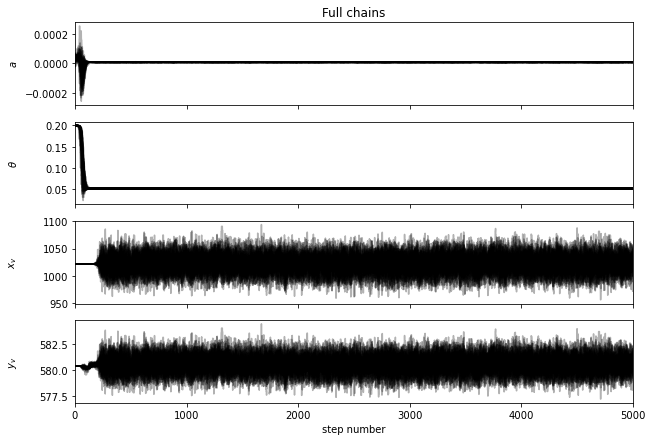

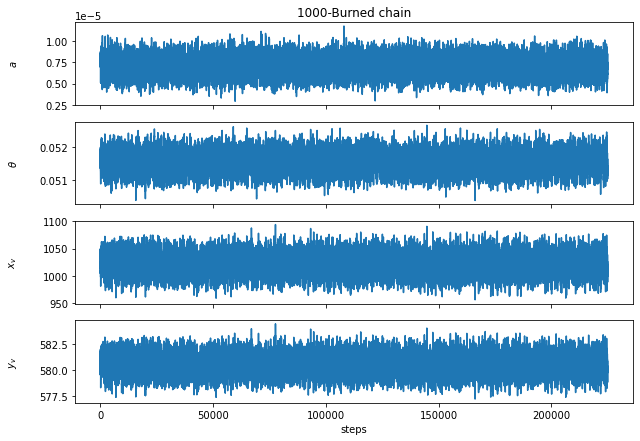

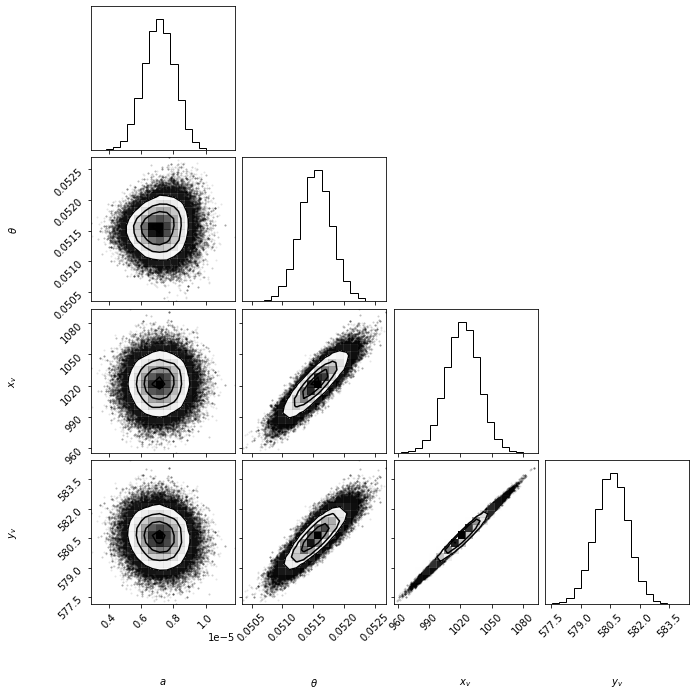

100%|██████████| 5000/5000 [01:39<00:00, 50.43it/s]


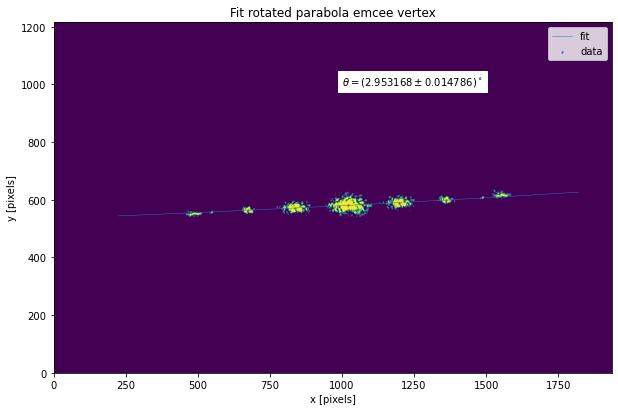

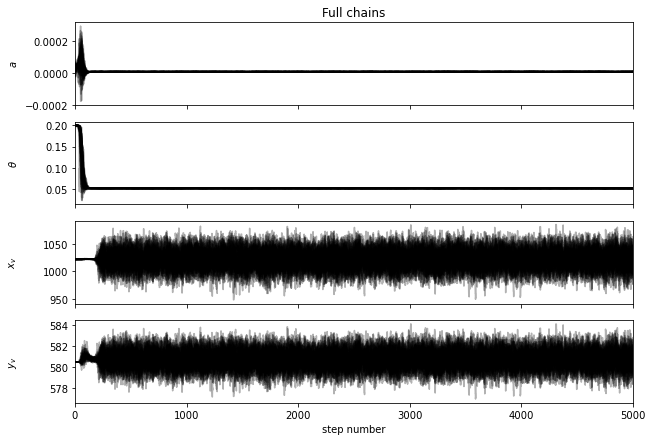

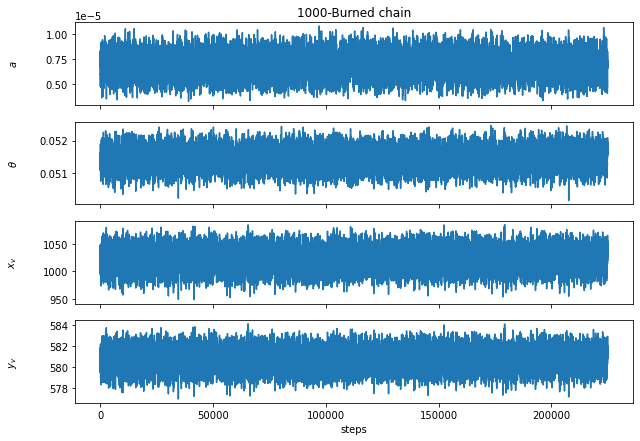

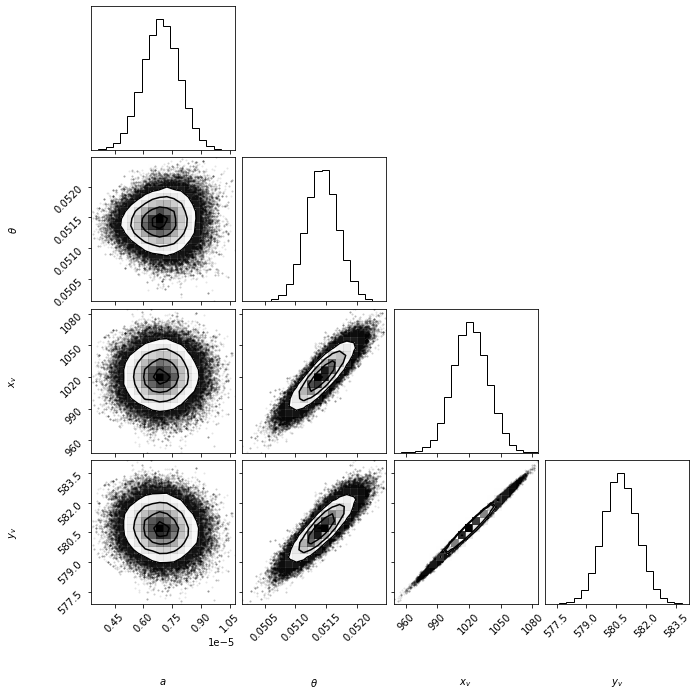

done
         121430672 function calls (121150072 primitive calls) in 224.685 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     61/1    0.001    0.000  224.691  224.691 {built-in method builtins.exec}
        1    0.000    0.000  224.691  224.691 <ipython-input-2-d5ceb362bf50>:1(run_DPanalysis)
        2    0.001    0.001  220.224  110.112 get_pattern_orientation.py:94(fit_emcee_cen)
        2    0.009    0.005  204.338  102.169 ensemble.py:419(run_mcmc)
    10002    0.191    0.000  204.329    0.020 ensemble.py:251(sample)
    10000    2.145    0.000  198.100    0.020 red_blue.py:52(propose)
    20002    1.236    0.000  193.440    0.010 ensemble.py:451(compute_log_prob)
   500100    1.042    0.000  191.094    0.000 ensemble.py:622(__call__)
   500100    5.731    0.000  190.052    0.000 get_pattern_orientation.py:85(log_Posterior_cen)
   500100   15.500    0.000  180.833    0.000 get_pattern_orientation.py:65(log_Prior_

     1119    0.222    0.000    0.222    0.000 {method 'set_text' of 'matplotlib.ft2font.FT2Font' objects}
  1000200    0.221    0.000    0.221    0.000 multiarray.py:1106(putmask)
      421    0.010    0.000    0.217    0.001 lines.py:607(get_window_extent)
  1002862    0.216    0.000    0.216    0.000 fromnumeric.py:2399(_all_dispatcher)
        1    0.000    0.000    0.208    0.208 arraymath.py:160(array_sum)
       24    0.002    0.000    0.205    0.009 contour.py:726(__init__)
      231    0.003    0.000    0.204    0.001 postproc.py:68(run)
       50    0.001    0.000    0.199    0.004 _base.py:611(_init_axis)
      100    0.001    0.000    0.198    0.002 _base.py:3015(tick_params)
      192    0.001    0.000    0.198    0.001 module.py:233(__repr__)
     9011    0.020    0.000    0.195    0.000 colors.py:161(to_rgba)
      192    0.001    0.000    0.195    0.001 module.py:207(_get_body_lines)
  1000200    0.194    0.000    0.194    0.000 numerictypes.py:650(<listcomp>)
      192 

     7550    0.013    0.000    0.070    0.000 markers.py:230(_recache)
      460    0.011    0.000    0.070    0.000 axis.py:1451(update_units)
    36734    0.069    0.000    0.069    0.000 {method 'copy' of 'numpy.ndarray' objects}
      826    0.001    0.000    0.069    0.000 context.py:220(decref)
       12    0.000    0.000    0.068    0.006 collections.py:1128(set_verts)
       50    0.001    0.000    0.068    0.001 axis.py:2257(__init__)
       12    0.005    0.000    0.068    0.006 collections.py:1160(<listcomp>)
     6425    0.006    0.000    0.067    0.000 transforms.py:1267(__add__)
     4948    0.043    0.000    0.067    0.000 artist.py:69(__init__)
     1597    0.002    0.000    0.067    0.000 font_manager.py:713(_from_any)
    21800    0.055    0.000    0.067    0.000 getlimits.py:457(__new__)
    21021    0.022    0.000    0.067    0.000 contextlib.py:238(helper)
    11359    0.014    0.000    0.066    0.000 <__array_function__ internals>:177(dot)
       31    0.001    0.

       68    0.001    0.000    0.035    0.001 arrayobj.py:70(_make_refs)
      207    0.006    0.000    0.035    0.000 context.py:578(resolve_overload)
    16239    0.019    0.000    0.035    0.000 __init__.py:804(clean)
       84    0.000    0.000    0.035    0.000 postproc.py:155(_insert_var_dels)
       84    0.010    0.000    0.035    0.000 postproc.py:175(_patch_var_dels)
      612    0.003    0.000    0.034    0.000 text.py:252(update_from)
     5090    0.010    0.000    0.034    0.000 text.py:818(get_unitless_position)
    52/28    0.000    0.000    0.034    0.001 _base.py:3144(set_xbound)
      231    0.001    0.000    0.033    0.000 postproc.py:51(deadmaps)
     2620    0.006    0.000    0.033    0.000 backend_bases.py:900(set_clip_path)
     3067    0.002    0.000    0.033    0.000 _methods.py:42(_amin)
    15546    0.015    0.000    0.033    0.000 __init__.py:1281(_to_unmasked_float_array)
       21    0.000    0.000    0.033    0.002 ssa.py:26(reconstruct_ssa)
       21    

     1258    0.002    0.000    0.019    0.000 transforms.py:796(unit)
       21    0.000    0.000    0.019    0.001 transforms.py:317(with_lifting)
       74    0.001    0.000    0.019    0.000 _base.py:1917(add_collection)
      720    0.005    0.000    0.019    0.000 nrtopt.py:93(_prune_redundant_refct_ops)
    12796    0.006    0.000    0.019    0.000 pyparsing.py:1777(get)
    31333    0.011    0.000    0.019    0.000 {built-in method builtins.setattr}
        1    0.000    0.000    0.019    0.019 cffi_utils.py:2(<module>)
      301    0.000    0.000    0.019    0.000 __init__.py:1596(_has)
        1    0.000    0.000    0.019    0.019 api.py:41(__init__)
      884    0.001    0.000    0.019    0.000 <__array_function__ internals>:177(ptp)
       96    0.005    0.000    0.019    0.000 colors.py:390(_create_lookup_table)
      285    0.001    0.000    0.019    0.000 _base.py:911(_set_position)
       52    0.000    0.000    0.019    0.000 callconv.py:384(return_user_exc)
    89480  

      810    0.002    0.000    0.011    0.000 ir.py:845(__str__)
       21    0.000    0.000    0.011    0.001 lowering.py:255(setup_function)
      192    0.002    0.000    0.011    0.000 function_base.py:2276(__call__)
     3483    0.007    0.000    0.011    0.000 __init__.py:1268(is_math_text)
     1438    0.003    0.000    0.011    0.000 builder.py:268(goto_entry_block)
      126    0.001    0.000    0.011    0.000 colors.py:988(process_value)
     9072    0.008    0.000    0.011    0.000 artist.py:367(get_transform)
      295    0.001    0.000    0.011    0.000 _base.py:826(get_yaxis_text2_transform)
     9433    0.007    0.000    0.011    0.000 function_base.py:346(iterable)
       50    0.001    0.000    0.011    0.000 _base.py:621(set_figure)
      311    0.001    0.000    0.011    0.000 _base.py:750(get_xaxis_text2_transform)
       82    0.001    0.000    0.011    0.000 core.py:5797(max)
       21    0.000    0.000    0.010    0.000 compiler.py:439(define_pipelines)
        8

      546    0.001    0.000    0.006    0.000 patches.py:328(set_edgecolor)
  594/569    0.001    0.000    0.006    0.000 base.py:703(cast)
     1608    0.002    0.000    0.006    0.000 artist.py:1028(set_zorder)
     2244    0.002    0.000    0.006    0.000 lines.py:486(set_pickradius)
       38    0.000    0.000    0.006    0.000 pyparsing.py:1283(_trim_arity)
       21    0.000    0.000    0.006    0.000 funcdesc.py:182(from_specialized_function)
       84    0.000    0.000    0.006    0.000 extending.py:129(register_jitable)
    12283    0.004    0.000    0.006    0.000 sre_parse.py:164(__getitem__)
       21    0.000    0.000    0.006    0.000 funcdesc.py:163(_from_python_function)
        2    0.000    0.000    0.006    0.003 hdulist.py:37(fitsopen)
      937    0.005    0.000    0.006    0.000 text.py:39(get_rotation)
       25    0.000    0.000    0.006    0.000 pythonapi.py:1328(serialize_uncached)
     1542    0.001    0.000    0.006    0.000 fromnumeric.py:1866(nonzero)
    

        1    0.000    0.000    0.004    0.004 rangeobj.py:104(from_range_state)
     2244    0.002    0.000    0.004    0.000 lines.py:1022(set_antialiased)
      418    0.000    0.000    0.004    0.000 values.py:127(_to_string)
      616    0.003    0.000    0.004    0.000 functions.py:244(__init__)
      173    0.000    0.000    0.004    0.000 builder.py:568(icmp_unsigned)
      314    0.003    0.000    0.004    0.000 analysis.py:91(liveness)
       38    0.000    0.000    0.004    0.000 linecache.py:53(checkcache)
      182    0.000    0.000    0.004    0.000 ir.py:1018(__repr__)
     1112    0.002    0.000    0.004    0.000 transforms.py:2356(transform_path_non_affine)
        1    0.000    0.000    0.004    0.004 arrayobj.py:2759(iternext_specific)
  923/903    0.001    0.000    0.004    0.000 traitlets.py:533(get)
     9386    0.003    0.000    0.003    0.000 _utils.py:71(_stringify_metadata)
      771    0.002    0.000    0.003    0.000 warnings.py:181(_add_filter)
     2244    

       24    0.000    0.000    0.002    0.000 npyimpl.py:377(<listcomp>)
     1294    0.001    0.000    0.002    0.000 transforms.py:1282(_iter_break_from_left_to_right)
       35    0.002    0.000    0.002    0.000 {method 'update' of '_hashlib.HASH' objects}
        4    0.000    0.000    0.002    0.001 legend_handler.py:89(legend_artist)
     1848    0.002    0.000    0.002    0.000 _methods.py:101(_clip_dep_is_byte_swapped)
       72    0.000    0.000    0.002    0.000 pyparsing.py:2138(__add__)
  337/198    0.001    0.000    0.002    0.000 packer.py:123(_assign_names)
     6137    0.002    0.000    0.002    0.000 controlflow.py:116(successors)
        5    0.000    0.000    0.002    0.000 pythonapi.py:204(emit_environment_sentry)
      296    0.000    0.000    0.002    0.000 re.py:203(sub)
       92    0.000    0.000    0.002    0.000 values.py:45(bitcast)
      707    0.000    0.000    0.002    0.000 base.py:381(_insert_getattr_defn)
      250    0.002    0.000    0.002    0.000 

       24    0.000    0.000    0.001    0.000 _axes.py:256(set_ylabel)
       48    0.000    0.000    0.001    0.000 collections.py:1395(set_segments)
        1    0.000    0.000    0.001    0.001 fractions.py:4(<module>)
       21    0.000    0.000    0.001    0.000 byteflow.py:161(_prune_phis)
     2025    0.001    0.000    0.001    0.000 ffi.py:250(__init__)
      942    0.001    0.000    0.001    0.000 axis.py:1389(get_minor_ticks)
       12    0.000    0.000    0.001    0.000 context.py:68(meminfo_alloc_aligned)
     2106    0.001    0.000    0.001    0.000 ir.py:251(__hash__)
      429    0.001    0.000    0.001    0.000 ffi.py:183(__init__)
     2096    0.001    0.000    0.001    0.000 types.py:231(__eq__)
      899    0.001    0.000    0.001    0.000 __init__.py:158(__init__)
       59    0.000    0.000    0.001    0.000 interpreter.py:227(_end_current_block)
      102    0.000    0.000    0.001    0.000 transforms.py:1912(clear)
        4    0.000    0.000    0.001    0.000 tr

        5    0.000    0.000    0.001    0.000 base.py:345(nrt)
      180    0.000    0.000    0.001    0.000 artist.py:711(set_clip_box)
       21    0.000    0.000    0.001    0.000 controlflow.py:546(_find_dominators)
       27    0.000    0.000    0.001    0.000 interpreter.py:1210(op_RETURN_VALUE)
        6    0.000    0.000    0.001    0.000 text.py:66(_get_textbox)
       73    0.000    0.000    0.001    0.000 base.py:87(_sort_signatures)
       18    0.000    0.000    0.001    0.000 interpreter.py:1248(_op_JUMP_IF)
      500    0.000    0.000    0.001    0.000 common.py:4(_encode_string)
      640    0.001    0.000    0.001    0.000 values.py:533(add)
       82    0.000    0.000    0.001    0.000 <__array_function__ internals>:177(unravel_index)
     1809    0.001    0.000    0.001    0.000 sre_parse.py:160(__len__)
       62    0.000    0.000    0.001    0.000 typeinfer.py:1005(seed_argument)
      200    0.000    0.000    0.001    0.000 axis.py:980(_set_artist_props)
       97

     2795    0.001    0.000    0.001    0.000 ir.py:1021(__str__)
       18    0.000    0.000    0.001    0.000 interpreter.py:1112(op_BINARY_ADD)
       30    0.000    0.000    0.001    0.000 byteflow.py:750(op_CALL_FUNCTION)
        4    0.000    0.000    0.001    0.000 arrayprint.py:907(__init__)
        1    0.000    0.000    0.001    0.001 formatters.py:61(_default_mime_formatter)
     2787    0.001    0.000    0.001    0.000 {built-in method time.perf_counter}
     1276    0.001    0.000    0.001    0.000 backend_bases.py:911(set_dashes)
       48    0.001    0.000    0.001    0.000 {method 'create_contour' of 'matplotlib.QuadContourGenerator' objects}
    88/84    0.000    0.000    0.001    0.000 pyparsing.py:4086(__str__)
      483    0.000    0.000    0.001    0.000 compiler_lock.py:13(release)
      290    0.000    0.000    0.001    0.000 itanium_mangler.py:116(_len_encoded)
      188    0.000    0.000    0.001    0.000 interpreter.py:54(assign)
       12    0.000    0.000   

      148    0.000    0.000    0.000    0.000 typing.py:868(__new__)
      229    0.000    0.000    0.000    0.000 text.py:341(<listcomp>)
       43    0.000    0.000    0.000    0.000 types.py:500(structure_repr)
      400    0.000    0.000    0.000    0.000 artist.py:1094(<genexpr>)
       26    0.000    0.000    0.000    0.000 typeof.py:82(typeof_type)
      174    0.000    0.000    0.000    0.000 module.py:208(__init__)
       12    0.000    0.000    0.000    0.000 path.py:464(cleaned)
       48    0.000    0.000    0.000    0.000 ir_utils.py:1569(find_const)
     1152    0.000    0.000    0.000    0.000 spines.py:212(get_path)
      293    0.000    0.000    0.000    0.000 pyparsing.py:4091(<genexpr>)
       62    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:1265(_path_importer_cache)
       10    0.000    0.000    0.000    0.000 twodim_base.py:370(tri)
      140    0.000    0.000    0.000    0.000 cpu.py:79(target_data)
      388    0.000    0.000    0.0

        6    0.000    0.000    0.000    0.000 base.py:793(copy)
        6    0.000    0.000    0.000    0.000 patches.py:2015(transmute)
       10    0.000    0.000    0.000    0.000 interpreter.py:1133(op_BINARY_POWER)
       82    0.000    0.000    0.000    0.000 card.py:214(keyword)
       46    0.000    0.000    0.000    0.000 functools.py:34(update_wrapper)
       47    0.000    0.000    0.000    0.000 pyparsing.py:5031(__ilshift__)
      311    0.000    0.000    0.000    0.000 typeinfer.py:1201(<genexpr>)
      208    0.000    0.000    0.000    0.000 cpu_options.py:82(__init__)
     1046    0.000    0.000    0.000    0.000 analysis.py:141(<genexpr>)
       21    0.000    0.000    0.000    0.000 type_annotations.py:56(__init__)
      100    0.000    0.000    0.000    0.000 listdecl.py:128(generic)
      784    0.000    0.000    0.000    0.000 axis.py:381(<dictcomp>)
      400    0.000    0.000    0.000    0.000 _base.py:949(get_axes_locator)
      892    0.000    0.000    0.000   

      165    0.000    0.000    0.000    0.000 inspect.py:513(_is_wrapper)
       21    0.000    0.000    0.000    0.000 byteflow.py:180(find_use_defs)
        6    0.000    0.000    0.000    0.000 legend_handler.py:69(_default_update_prop)
      456    0.000    0.000    0.000    0.000 ufunc_db.py:18(_lazy_init_db)
       70    0.000    0.000    0.000    0.000 sre_compile.py:249(_compile_charset)
        9    0.000    0.000    0.000    0.000 Image.py:442(_getencoder)
       66    0.000    0.000    0.000    0.000 utils.py:366(bit_length)
       15    0.000    0.000    0.000    0.000 backend_bases.py:142(__init__)
      136    0.000    0.000    0.000    0.000 core.py:776(is_string_or_list_of_strings)
    46/40    0.000    0.000    0.000    0.000 models.py:488(inner_types)
       77    0.000    0.000    0.000    0.000 {method 'getvalue' of '_io.StringIO' objects}
        1    0.000    0.000    0.000    0.000 commontypes.py:1(<module>)
       12    0.000    0.000    0.000    0.000 patches.p

       49    0.000    0.000    0.000    0.000 controlflow.py:373(_remove_node_edges)
       18    0.000    0.000    0.000    0.000 base.py:256(is_dtype)
       26    0.000    0.000    0.000    0.000 re.py:325(_subx)
       42    0.000    0.000    0.000    0.000 base.py:1132(push_code_library)
        8    0.000    0.000    0.000    0.000 file.py:371(seek)
       14    0.000    0.000    0.000    0.000 path.py:764(unit_circle)
      303    0.000    0.000    0.000    0.000 ssa.py:324(<listcomp>)
      300    0.000    0.000    0.000    0.000 collections.py:222(get_transforms)
       24    0.000    0.000    0.000    0.000 ticker.py:1856(__init__)
        2    0.000    0.000    0.000    0.000 groups.py:280(match_header)
      157    0.000    0.000    0.000    0.000 bunch.py:11(__getattr__)
       20    0.000    0.000    0.000    0.000 configurable.py:121(<listcomp>)
       11    0.000    0.000    0.000    0.000 genericpath.py:121(_splitext)
      444    0.000    0.000    0.000    0.000 npyde

       42    0.000    0.000    0.000    0.000 compiler_machinery.py:359(walk)
      108    0.000    0.000    0.000    0.000 ir.py:1263(is_terminated)
    21/13    0.000    0.000    0.000    0.000 model.py:81(__hash__)
        2    0.000    0.000    0.000    0.000 templates.py:871(make_intrinsic_template)
       17    0.000    0.000    0.000    0.000 module.py:122(<listcomp>)
        3    0.000    0.000    0.000    0.000 __init__.py:1272(getLogger)
        2    0.000    0.000    0.000    0.000 extras.py:291(<listcomp>)
       19    0.000    0.000    0.000    0.000 sre_parse.py:84(opengroup)
      146    0.000    0.000    0.000    0.000 byteflow.py:1248(get_varname)
       47    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:342(__init__)
       25    0.000    0.000    0.000    0.000 Image.py:530(__init__)
        2    0.000    0.000    0.000    0.000 inline_closurecall.py:825(_find_arraycall)
       41    0.000    0.000    0.000    0.000 inline_closurecall.py:241(_inline

      150    0.000    0.000    0.000    0.000 pyparsing.py:4026(<genexpr>)
       20    0.000    0.000    0.000    0.000 dataset.py:1722(xindexes)
        5    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:194(_lock_unlock_module)
      231    0.000    0.000    0.000    0.000 registry.py:10(__init__)
       42    0.000    0.000    0.000    0.000 _collections_abc.py:271(__subclasshook__)
       45    0.000    0.000    0.000    0.000 typeinfer.py:1480(sentry_modified_builtin)
       22    0.000    0.000    0.000    0.000 array_exprs.py:130(_translate_expr)
     14/7    0.000    0.000    0.000    0.000 display.py:41(_merge)
      192    0.000    0.000    0.000    0.000 polynomial.py:167(_roots_dispatcher)
      105    0.000    0.000    0.000    0.000 cpu.py:88(codegen)
       16    0.000    0.000    0.000    0.000 common.py:149(cast_scalar_indexer)
       21    0.000    0.000    0.000    0.000 errors.py:427(__init__)
        1    0.000    0.000    0.000    0.000 enumimpl.

       20    0.000    0.000    0.000    0.000 utils.py:696(hashable)
        2    0.000    0.000    0.000    0.000 ensemble.py:237(reset)
        6    0.000    0.000    0.000    0.000 common.py:608(is_dtype_equal)
       42    0.000    0.000    0.000    0.000 ir.py:256(__init__)
       59    0.000    0.000    0.000    0.000 byteflow.py:1323(infos)
       33    0.000    0.000    0.000    0.000 callconv.py:570(__init__)
       21    0.000    0.000    0.000    0.000 context.py:628(keyfunc)
        1    0.000    0.000    0.000    0.000 random.py:123(seed)
       46    0.000    0.000    0.000    0.000 bytecode.py:80(is_jump)
       16    0.000    0.000    0.000    0.000 templates.py:1109(register_attr)
       57    0.000    0.000    0.000    0.000 {built-in method builtins.delattr}
        8    0.000    0.000    0.000    0.000 __init__.py:1198(is_interactive)
       78    0.000    0.000    0.000    0.000 npytypes.py:303(key)
       98    0.000    0.000    0.000    0.000 tight_bbox.py:31(<la

        3    0.000    0.000    0.000    0.000 dictobject.py:724(impl_getitem)
        1    0.000    0.000    0.000    0.000 randomdecl.py:206(Numpy_normal)
        4    0.000    0.000    0.000    0.000 patches.py:1854(<dictcomp>)
        7    0.000    0.000    0.000    0.000 imputils.py:140(_decorate_getattr)
       24    0.000    0.000    0.000    0.000 pyparsing.py:315(__init__)
       36    0.000    0.000    0.000    0.000 base.py:1175(name)
       44    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:774(create_module)
        2    0.000    0.000    0.000    0.000 file.py:442(_try_read_compressed)
        6    0.000    0.000    0.000    0.000 common.py:188(<lambda>)
       34    0.000    0.000    0.000    0.000 function_base.py:4800(_meshgrid_dispatcher)
       40    0.000    0.000    0.000    0.000 templates.py:1053(bound_function)
        6    0.000    0.000    0.000    0.000 {method 'squeeze' of 'numpy.ndarray' objects}
       15    0.000    0.000    0.00

        2    0.000    0.000    0.000    0.000 utils.py:382(two_de)
        1    0.000    0.000    0.000    0.000 GifImagePlugin.py:51(GifImageFile)
        4    0.000    0.000    0.000    0.000 header.py:336(_modified)
        2    0.000    0.000    0.000    0.000 header.py:1985(__delete__)
        1    0.000    0.000    0.000    0.000 __init__.py:23(find_module)
        8    0.000    0.000    0.000    0.000 coordinates.py:244(__init__)
        3    0.000    0.000    0.000    0.000 templates.py:1073(MethodTemplate)
        5    0.000    0.000    0.000    0.000 {built-in method numba.core.typeconv._typeconv.get_pointer}
       16    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:1400(<genexpr>)
       12    0.000    0.000    0.000    0.000 patches.py:3703(get_mutation_scale)
        2    0.000    0.000    0.000    0.000 extending.py:318(__repr__)
       19    0.000    0.000    0.000    0.000 lex.py:1089(TOKEN)
        1    0.000    0.000    0.000    0.000 PpmIma

        4    0.000    0.000    0.000    0.000 parse.py:99(_noop)
        1    0.000    0.000    0.000    0.000 six.py:184(find_module)
        2    0.000    0.000    0.000    0.000 collections.py:893(get_sizes)
        2    0.000    0.000    0.000    0.000 byteflow.py:1179(peek)
        3    0.000    0.000    0.000    0.000 __init__.py:3094(<listcomp>)
        6    0.000    0.000    0.000    0.000 pyparsing.py:4383(postParse)
        4    0.000    0.000    0.000    0.000 abstract.py:104(mangling_args)
        1    0.000    0.000    0.000    0.000 yacc.py:1381(MiniProduction)
        1    0.000    0.000    0.000    0.000 c_ast.py:210(Assignment)
        1    0.000    0.000    0.000    0.000 collections.py:81(NamedTupleAttribute)
        1    0.000    0.000    0.000    0.000 dictdecl.py:24(DictBuiltin)
        1    0.000    0.000    0.000    0.000 arraydecl.py:594(ArrayCTypesAttribute)
        1    0.000    0.000    0.000    0.000 npdatetime.py:147(TimedeltaCmpEq)
        1    0.000    0

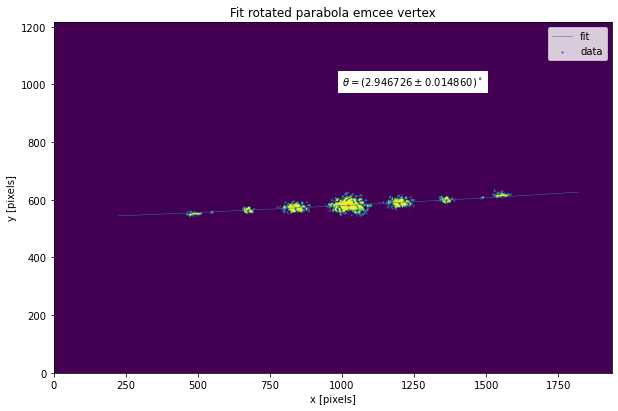

In [3]:
time_in = time.time()
cProfile.run('run_DPanalysis()', sort='cumtime')
time_end = time.time()

Before the optimization the code tooks more or less 15 minutes to run.

Opimizing the mcmc parameters and by jitting with numba some pythonic function used to perform the mcmc:

In [6]:
delta_time = time_end - time_in
print('Time needed to run the function after optimization:', delta_time, ' s')

Time needed to run the function after optimization: 229.47493600845337  s


Which are equivalent to more or less 4 minutes